In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs
from scipy.integrate import solve_ivp

/var/folders/t5/9sv_s5mx3yg2p47csd0m6fkm0000gn/T/ipykernel_46841/1244381275.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(y[:, 0]**2, ysol.t)


A5 [[1.10632401e-01 3.42995987e-01]
 [1.31425452e-01 3.80308372e-01]
 [1.55620741e-01 4.20317753e-01]
 [1.83285244e-01 4.61688409e-01]
 [2.14395026e-01 5.02884359e-01]
 [2.48815413e-01 5.42261741e-01]
 [2.86300988e-01 5.78068810e-01]
 [3.26495596e-01 6.08445935e-01]
 [3.69025012e-01 6.31547722e-01]
 [4.13247276e-01 6.45555100e-01]
 [4.58248955e-01 6.48574054e-01]
 [5.03110823e-01 6.39164073e-01]
 [5.46908748e-01 6.16356304e-01]
 [5.88713689e-01 5.79653551e-01]
 [6.27591697e-01 5.29030280e-01]
 [6.62603917e-01 4.64985072e-01]
 [6.92806585e-01 3.88673754e-01]
 [7.17251030e-01 3.01714850e-01]
 [7.35085963e-01 2.06172940e-01]
 [7.45920093e-01 1.04560066e-01]
 [7.49523358e-01 1.64269229e-04]
 [7.45833671e-01 1.04717062e-01]
 [7.34963288e-01 2.06225201e-01]
 [7.17198809e-01 3.01773569e-01]
 [6.93001177e-01 3.88808918e-01]
 [6.63005676e-01 4.65218872e-01]
 [6.28021935e-01 5.29331931e-01]
 [5.89032820e-01 5.79940683e-01]
 [5.47101151e-01 6.16579292e-01]
 [5.03237672e-01 6.39353212e-01]
 [4.584

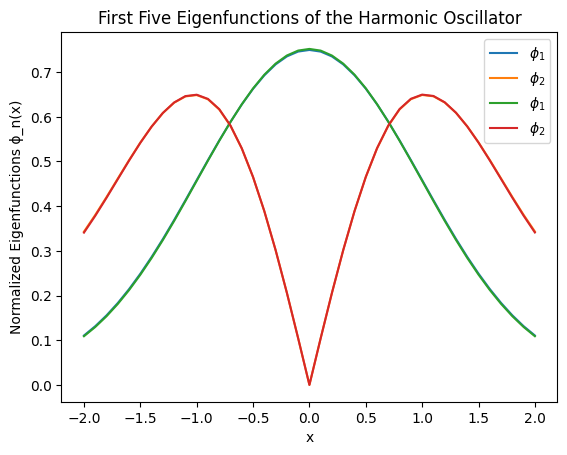

In [4]:
def bvp_rhs_c(x, y, epsilon, gamma):
    return [y[1], (gamma * np.abs(y[0])**2 + x**2 - epsilon)*y[0]]

# Initialization
L = 2
xspan = np.arange(-L, L + 0.1, 0.1)
A = 0.1
k = 1
tol = 1e-6
gamma_vals = [0.05, -0.05]
epsilon_list = [0]
eps_fun = []
A6 = []
A5 = np.zeros((41, 2))
A8 = []
A7 = np.zeros((41, 2))

for gamma in gamma_vals:
    epsilon_start = epsilon_list[0]
    A = 0.01
    for mode in range(1, 3):
        dA = 0.01
        for i in range(10000):
            epsilon = epsilon_start
            depsilon = 0.2
            for j in range(10000):
                y0 = [A, A * np.sqrt(k * L**2 - epsilon)]
                ysol = solve_ivp(lambda x, y: bvp_rhs_c(x, y, epsilon, gamma),
                            [xspan[0], xspan[-1]], y0, t_eval=xspan)
                y = ysol.y.T
                if abs(y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) < tol:
                    # epsilon_list.append(epsilon)
                    # print(epsilon)
                    break
                if (-1) ** (mode+1) * (y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) > 0:
                    epsilon += depsilon
                else:
                    epsilon -= depsilon
                    depsilon /= 2
            area = np.trapz(y[:, 0]**2, ysol.t)
            if abs(area - 1) < tol:
                break
            if area - 1 < 0:
                A += dA
            else:
                A = A - (dA/2)
                dA /= 2
        epsilon_start = epsilon + 0.2
        eps_fun.append(abs(y[:, 0]) / np.sqrt(area))
        plt.plot(xspan, eps_fun[-1], label=f'$\\phi_{mode}$')
        if gamma == 0.05:
            A6.append(epsilon)
            A5[:, mode - 1] = (abs(y[:, 0]))
        else:
            A8.append(epsilon)
            A7[:, mode - 1] = (abs(y[:, 0]))
print("A5", A5)
print("A7", A7)
print("A6: ", A6)
print("A8: ", A8)
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunctions ϕ_n(x)')
plt.title('First Five Eigenfunctions of the Harmonic Oscillator')
plt.legend()
plt.show()